In [1]:
from src import config
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "memory_performance_features_df.pkl"))

In [3]:
# Remove all the features that are not contains 'Pre' in their name
features_df = features_df.loc[:, ~features_df.columns.str.contains('Post')]

features_df.head()

,Blinks_Per_Minute,Blinks_Duration_Mean,Blinks_Duration_Median,Blink_Variability,Blinks_Duration_Min,Blinks_Duration_Max,Fixations_Count,Fixations_Rate,Fixations_Duration_Mean,Fixations_Duration_Median,...,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
0,29.629703,84.537806,171.356158,308.577793,1953.355125,158.781191,125.155094,130.078666,-38.611760,-53.931175,...,NaN,NaN,NaN,19.327520,19.278459,31.123628,25.669463,54.609009,3.046730,109.464816
1,-3.560811,-7.742613,10.076378,-48.747948,41.242590,-15.367943,12.831882,11.919452,8.046658,8.408327,...,5.072166,7.51752,1.393107,3.754065,12.157995,8.030864,1.526479,10.649260,10.772439,12.509323
2,52.594035,637.473520,1040.890555,758.326087,2129.170350,800.947619,-39.865928,-43.026636,-11.369167,-0.229015,...,28.110134,-11.89938,8.574434,-5.469009,-2.103247,-31.550360,-24.422746,63.387827,-11.474241,-38.168196
3,-10.813406,67.568581,290.828656,240.653825,106.941559,73.902867,72.865431,48.783666,31.503846,25.259839,...,NaN,NaN,NaN,31.491892,43.872023,-8.764426,8.143531,367.051993,-12.549955,101.726914
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



In this notebook we will try to predict the memory performance of the subjects using the features we extracted from the eye tracking data. We will use regression models to predict the memory performance. 

We will use the following models:
- Linear Regression
- Lasso Regression
- Support Vector Regression
- Random Forest Regression
- Gradient Boosting Regression
- K-Nearest Neighbors Regression
- Neural Network Regression
- Gaussian Process Regression
- Decision Tree Regression
- AdaBoost Regression
- Bagging Regression
- Extra Trees Regression
- Ridge Regression
- Elastic Net Regression

# EDA

In [4]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Columns: 137 entries, Blinks_Per_Minute to DVA_AUC_Fixations_Pre
dtypes: float64(137)
memory usage: 33.3 KB


In [5]:
features_df.describe()

,Blinks_Per_Minute,Blinks_Duration_Mean,Blinks_Duration_Median,Blink_Variability,Blinks_Duration_Min,Blinks_Duration_Max,Fixations_Count,Fixations_Rate,Fixations_Duration_Mean,Fixations_Duration_Median,...,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
count,28.000000,28.000000,28.000000,26.000000,28.000000,28.000000,29.000000,29.000000,29.000000,29.000000,...,25.000000,25.000000,25.000000,29.000000,29.000000,29.000000,29.000000,28.000000,29.000000,29.000000
mean,15.946138,791.555105,825.173674,480.425614,853.217124,1257.853978,-0.014334,-1.118481,11.315305,9.393449,...,32.443418,5.913457,1.294936,0.274447,1.145944,2.646272,-1.201989,38.618969,6.647816,3.700775
std,40.347177,3428.624030,3426.123390,846.312345,1645.555886,5616.277167,35.190569,33.946716,27.052599,27.656167,...,55.651421,14.686584,10.114073,9.322271,11.429983,14.280327,10.860073,83.644197,11.951503,35.192814
min,-53.650575,-71.666666,-68.100441,-71.655142,-76.670899,-73.090864,-52.374729,-56.046011,-74.442046,-73.560666,...,-32.959634,-11.899380,-13.571038,-18.351519,-17.077830,-31.550360,-31.407195,-14.025874,-15.698504,-53.506775
25%,-12.276721,8.499971,9.411555,-27.277506,45.271460,5.917685,-13.333844,-13.701049,2.735568,-1.563588,...,2.619159,-0.647167,-4.078315,-4.156216,-4.044119,-1.913535,-3.720485,-1.334559,1.035556,-13.074292
50%,13.958141,76.555144,117.359191,170.239489,191.769212,104.006648,-5.235573,-6.643040,12.367951,7.812357,...,21.709517,3.951202,0.044928,-1.090856,-0.782999,2.549376,-0.643504,11.167380,4.693046,-2.885680
75%,42.724377,269.426671,300.036146,599.931930,415.290814,287.682420,8.767216,7.320701,26.643497,21.862083,...,46.047297,8.412996,4.314561,2.498089,3.437138,11.680547,3.259268,45.890508,13.007006,12.843026
max,122.578947,18257.064746,18263.162374,3145.603860,6906.541994,29879.332129,125.155094,130.078666,63.738131,72.255184,...,197.722244,68.514949,38.847996,31.491892,43.872023,31.123628,25.669463,367.051993,41.828404,109.464816


Label distribution

array([[<AxesSubplot:title={'center':'memory_performance'}>]],
      dtype=object)

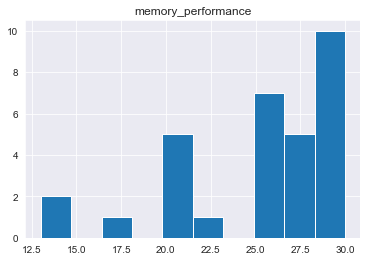

In [6]:
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "memory_performance_labels_df.pkl"))
# plot labels distribution
labels_df.hist()

## Data Cleaning

how many missing values / inf values are there in each column? show the top 10

In [7]:
features_df.shape

(31, 137)

In [8]:
num_rows_with_missing = features_df.isnull().any(axis=1).sum()
print("Number of rows with at least one missing value:", num_rows_with_missing)

Number of rows with at least one missing value: 31


In [9]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

Duration_Std_Fixations_In_RoI_Pre              0.967742
Duration_Sem_Saccades_End_In_RoI_Pre           0.967742
Duration_Sem_Fixations_In_RoI_Pre              0.967742
Duration_Std_Saccades_End_In_RoI_Pre           0.967742
peak_velocity_Sem_Saccades_End_In_RoI_Pre      0.935484
vis_angle_Sem_Saccades_Start_In_RoI_Pre        0.935484
vis_angle_Sem_Saccades_End_In_RoI_Pre          0.935484
vis_angle_Std_Saccades_Start_In_RoI_Pre        0.935484
peak_velocity_Std_Saccades_Start_In_RoI_Pre    0.935484
Duration_Sem_Saccades_Start_In_RoI_Pre         0.935484
dtype: float64

Remove columns with more than 30% missing values or inf values

In [10]:
features_df = features_df.loc[:, features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0) < 0.3]

In [11]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

Duration_Fixations_First_In_RoI_Pre    0.290323
Duration_Max_Fixations_In_RoI_Pre      0.290323
Duration_Min_Fixations_In_RoI_Pre      0.290323
DVA_Sem_Gaze_Pre                       0.193548
DVA_AUC_Gaze_Pre                       0.193548
Saccades_End_Counts_Out_RoI_Pre        0.193548
DVA_Mean_Gaze_Pre                      0.193548
DVA_Median_Gaze_Pre                    0.193548
DVA_Std_Gaze_Pre                       0.193548
DVA_Max_Gaze_Pre                       0.193548
dtype: float64

how many missing values / inf values are there in each row? show the top 10

In [12]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

20    1.00
4     1.00
0     0.28
16    0.24
22    0.22
3     0.20
10    0.12
17    0.08
28    0.06
1     0.06
dtype: float64

Remove rows with more than 50% missing values

In [13]:
features_df = features_df.loc[features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1) < 0.5]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [14]:
features_df.shape

(29, 50)

In [15]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

0     0.28
16    0.24
22    0.22
3     0.20
10    0.12
17    0.08
5     0.06
28    0.06
1     0.06
6     0.02
dtype: float64

# Split the data into train and test

In [16]:
# Excluding for comparison- BB13, DK47
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "memory_performance_series_id_df.pkl"))

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Shuffle the list of subject IDs randomly with seed 1
np.random.seed(1)
np.random.shuffle(subject_ids)

# Order the list of subject IDs alphabetically
# subject_ids = np.sort(subject_ids)

# Split the list of subject IDs into two parts
train_subject_ids = subject_ids[:int(len(subject_ids)*0.8)]
print(train_subject_ids)
test_subject_ids = subject_ids[int(len(subject_ids)*0.8):]
print(test_subject_ids)

# Subset the data based on the split list of subject IDs
train_data = series_id_df[series_id_df[config.SUBJECT].isin(train_subject_ids)]
test_data = series_id_df[series_id_df[config.SUBJECT].isin(test_subject_ids)]

X_train = features_df[features_df.index.isin(train_data.index)]
X_test = features_df[features_df.index.isin(test_data.index)]
y_train = labels_df[labels_df.index.isin(train_data.index)]
y_test = labels_df[labels_df.index.isin(test_data.index)]

['MR5' 'SH2' 'YM7' 'YC8' 'BR3' 'VZ9' 'ME8' 'RB7' 'YG3' 'GL2' 'IN9' 'MM7'
 'BYS5' 'YF58' 'BY8' 'EB9' 'AA9' 'YS2' 'YK6' 'BD7' 'EV2' 'AH3' 'AY1' 'GR5']
['NT3' 'ED9' 'AB7' 'ZL0' 'RO5' 'BB6' 'MG4']


Fill missing values with the mean of the column

In [17]:
# fill inf values with the mean of the column
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

X_train = X_train.fillna(0) # fill missing values with the mean of the column or zero ? features_df.mean()
X_test = X_test.fillna(0)

Remove columns with low variance (threshold = 5%)

In [18]:
from sklearn.feature_selection import VarianceThreshold

# Get the indices of the non-numerical columns
non_numeric_columns_idx = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(exclude=['float64', 'int64']).columns]

# Create VarianceThreshold object with a variance with a threshold of 0.05
thresholder = VarianceThreshold(threshold=0.05)

# Fit the thresholder to the data
thresholder.fit(X_train.select_dtypes(include=['float64', 'int64']))

# Get the indices of the columns that are retained
feature_idx = thresholder.get_support(indices=True)

# Create a list of the names of the retained columns, and the non-numerical columns
feature_idx = list(feature_idx) + list(non_numeric_columns_idx)
feature_names = X_train.columns[feature_idx]

# Print the names of the dropped columns
dropped_columns = list(set(X_train.columns) - set(feature_names))
print(dropped_columns)

# Subset the dataframe to include only the selected columns
X_train = X_train[feature_names]
X_test = X_test[feature_names]

[]


Remove highly correlated features

In [19]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

How many features are left?

In [20]:
X_train.shape

(22, 32)

**Feature Correlations**

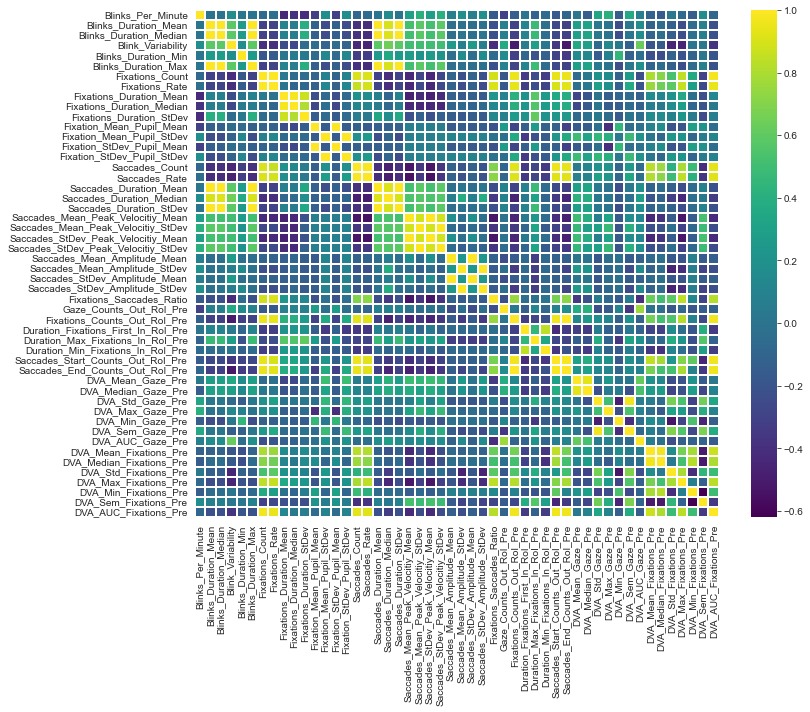

In [21]:
correlation_matrix = features_df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, ax=ax, cmap='viridis', linewidths=0.1)
plt.tight_layout()

## Balance the training data by generate new synthetic samples

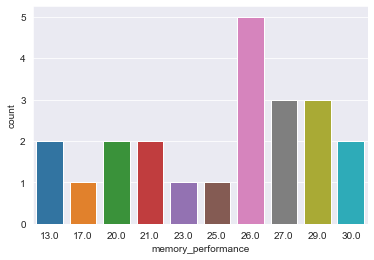

In [22]:
# Plot the distribution of the labels
_ = sns.countplot(x=y_train['memory_performance'], data=y_train)

The over-sampling strategy for the minority classes:

In [23]:
import math

age_counts = y_train['memory_performance'].value_counts()
max_count = age_counts.max()
age_counts_dict = age_counts.to_dict()

DESIRED_RATIO = .95
min_num_of_samples = math.ceil(max_count * DESIRED_RATIO)

# Remove all the classes that has enough data, and set desired number of observations for the rest 
sampling_strategy = {key: min_num_of_samples for key, value in age_counts_dict.items() if value <= min_num_of_samples}
sampling_strategy

{26.0: 5,
 29.0: 5,
 27.0: 5,
 13.0: 5,
 30.0: 5,
 20.0: 5,
 21.0: 5,
 23.0: 5,
 25.0: 5,
 17.0: 5}

In [24]:
# from imblearn.over_sampling import RandomOverSampler
# 
# random_oversample = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=420)
# X_train_resampled, y_train_resampled  = random_oversample.fit_resample(X_train, y_train)
# 
# _ = sns.countplot(x=y_train_resampled['memory_performance'], data=y_train_resampled)

Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

# Create separate StandardScaler instances
scaler_x = StandardScaler()
scaler_y = StandardScaler()

# Fit on Training Data (!)
scaler_x.fit(X_train.values)
scaler_y.fit(y_train.values.reshape(-1, 1))

# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
X_test_scaled = scaler_x.transform(X_test.values)
y_train_scaled = scaler_y.transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
y_train_scaled = pd.Series(y_train_scaled)
y_test_scaled = pd.Series(y_test_scaled)

In [26]:
X_train_scaled.head()

,Blinks_Per_Minute,Blinks_Duration_Mean,Blink_Variability,Blinks_Duration_Min,Fixations_Count,Fixations_Duration_Mean,Fixations_Duration_StDev,Fixation_Mean_Pupil_Mean,Fixation_Mean_Pupil_StDev,Saccades_Count,...,DVA_Median_Gaze_Pre,DVA_Std_Gaze_Pre,DVA_Max_Gaze_Pre,DVA_Min_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre
0,0.364525,-0.225360,-0.175226,0.984389,3.145692,-1.727993,-1.576285,-0.010674,-0.543398,1.505380,...,-0.246320,-0.538210,-0.233418,-0.416952,-0.306442,1.804783,1.748123,2.187256,0.160673,-0.296452
1,-0.402523,-0.249752,-0.588744,-0.559739,0.239806,-0.080325,-0.166886,0.452954,-0.849306,0.424503,...,1.055180,-0.128553,-0.362154,-0.298135,-0.159993,0.229662,0.281747,0.141008,-0.320716,0.290697
2,0.895241,-0.079203,0.345249,1.126369,-1.123525,-0.765964,-0.773202,-0.874331,0.423165,-0.996032,...,1.158270,-0.851773,-0.612092,0.241537,0.594937,-0.703172,-2.231636,-2.058329,0.256807,-1.400038
3,-0.570134,-0.229845,-0.253831,-0.506684,1.792919,0.748028,0.760912,0.972317,-0.865213,2.524834,...,-0.246320,-0.538210,-0.233418,-0.416952,-0.306442,3.035105,-0.784744,0.701838,3.582137,-1.481792
4,0.655101,-0.151191,3.107947,-0.305306,-0.767068,-0.267878,-0.346451,0.189507,-0.301381,-0.468733,...,0.749011,-0.690841,-0.054615,2.155546,3.777415,0.076887,-1.748412,-0.621169,0.130460,-0.958308


In [27]:
y_train_scaled.head()

0   -2.254930
1    1.187290
2   -0.837545
3    0.984806
4   -0.635062
dtype: float64

PCA

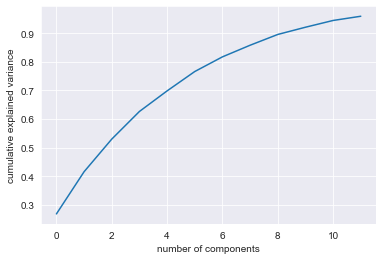

In [28]:
pca = PCA(n_components=0.95).fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [29]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

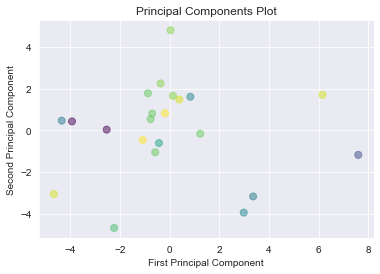

In [30]:
# Plot the first two principal components with the age color coded 
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train['memory_performance'], cmap='viridis', s=50, alpha=0.5)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
_ = plt.title("Principal Components Plot")

In [31]:
# I found that without PCA we get better results
X_train_preprocessed = X_train_scaled
X_test_preprocessed = X_test_scaled

y_train_preprocessed = y_train_scaled
y_test_preprocessed = y_test_scaled

# Regression models

An evaluation function that will be used for comparison:

In [32]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(model_name, y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  r_square = r2_score(y_true, y_pred)
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

  print(f"{model_name}- Mean Absolute Error:", mae)
  print("Mean Absolute Error (MAE): The average of the absolute differences between the predicted and actual values. It is expressed as: MAE = (1/n) * Σ|yi - ŷi|")
  print(f"{model_name}- Mean Squared Error:", mse)
  print("Mean Squared Error (MSE): The average of the squared differences between the predicted and actual values. It is expressed as: MSE = (1/n) * Σ(yi - ŷi)^2")
  print(f"{model_name}- R^2:", r_square)
  print("R-squared (R2): The proportion of variance in the target variable that is explained by the model. It is expressed as: R2 = 1 - (Σ(yi - ŷi)^2 / Σ(yi - ȳ)^2)")
  print(f"{model_name}- Mean Absolute Percentage Error:", mape)
  print("Mean Absolute Percentage Error (MAPE): The average percentage difference between the predicted and actual values. It is expressed as: MAPE = (1/n) * Σ| (yi - ŷi) / yi |")

  fig, ax = plt.subplots(figsize=(6, 6))
  ax.scatter(y_true, y_pred, color="black", s=8)
  ax.plot(y_true, y_true, color="red")
  ax.set_xlabel("Real Values")
  _ = ax.set_ylabel("Predicted Values")

# Linear Regression

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.linear_model import Lasso

# base estimator
linear_estimator = Lasso()

# Parameter grid of regularization strengths
ALPHAS = np.logspace(start=-3, stop=0, num=50, endpoint=True)
PARAM_GRID = {"alpha": ALPHAS}


# Search configuration
N_CROSS_VALIDATIONS = 7
SCORING = ["r2","neg_mean_squared_error"]
SCORER = "neg_mean_squared_error"

SEARCH_CONFIGURATION = {
    "estimator": linear_estimator,
    "param_grid": PARAM_GRID,
    "scoring": SCORING,
    "refit": SCORER,
    "cv": N_CROSS_VALIDATIONS,
    "n_jobs": 8
}

# GridSearchCV instantiation
linear_model_searcher = GridSearchCV(**SEARCH_CONFIGURATION)

_ = linear_model_searcher.fit(X_train_preprocessed, y_train_preprocessed)
predicted_ages = linear_model_searcher.predict(X_train_preprocessed)

# Get the best estimator
best_alpha = linear_model_searcher.best_params_["alpha"]
print("Linear Regression - best alpha parameter", best_alpha)

Linear Regression - best alpha parameter 0.5689866029018293


Evaluation using the test data

Linear Regression- Mean Absolute Error: 0.9059165341896589
Mean Absolute Error (MAE): The average of the absolute differences between the predicted and actual values. It is expressed as: MAE = (1/n) * Σ|yi - ŷi|
Linear Regression- Mean Squared Error: 0.8878441338415927
Mean Squared Error (MSE): The average of the squared differences between the predicted and actual values. It is expressed as: MSE = (1/n) * Σ(yi - ŷi)^2
Linear Regression- R^2: -1.0020622173709643
R-squared (R2): The proportion of variance in the target variable that is explained by the model. It is expressed as: R2 = 1 - (Σ(yi - ŷi)^2 / Σ(yi - ȳ)^2)
Linear Regression- Mean Absolute Percentage Error: 100.0
Mean Absolute Percentage Error (MAPE): The average percentage difference between the predicted and actual values. It is expressed as: MAPE = (1/n) * Σ| (yi - ŷi) / yi |


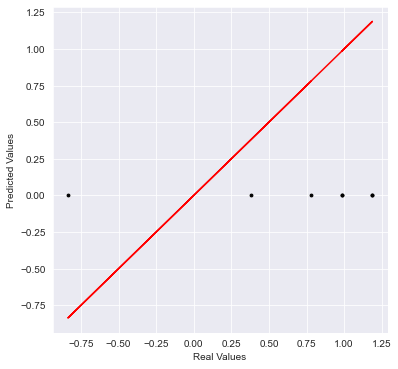

In [35]:
y_test_pred = linear_model_searcher.predict(X_test_preprocessed)

evaluate_model("Linear Regression", y_test_preprocessed, y_test_pred)

# Gradient Boosting Regression

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Fine tune the hyperparameters using GridSearchCV
param_grid = {'loss': ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate': [0.1, 1, 10],
              'n_estimators': [10, 100, 1000],
              'max_depth': [None, 10, 100],
              'min_samples_split': [2, 10, 100],
              'min_samples_leaf': [1, 10, 100],
              'max_features': ['auto', 'sqrt', 'log2']}

# Create the gradient boosting estimator
estimator = GradientBoostingRegressor(random_state=420)

# Use grid search and cross-validation to tune the hyperparameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=1)
model_searcher.fit(X_train_preprocessed, y_train_preprocessed)

# The best combination of hyperparameters
model_searcher.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\

{'alpha': 0.001}

Evaluation using the test data

Gradient Boosting regressor (test data)- Mean Absolute Error: 0.6920225872914346
Mean Absolute Error (MAE): The average of the absolute differences between the predicted and actual values. It is expressed as: MAE = (1/n) * Σ|yi - ŷi|
Gradient Boosting regressor (test data)- Mean Squared Error: 0.7636744503033331
Mean Squared Error (MSE): The average of the squared differences between the predicted and actual values. It is expressed as: MSE = (1/n) * Σ(yi - ŷi)^2
Gradient Boosting regressor (test data)- R^2: -0.7220632598070764
R-squared (R2): The proportion of variance in the target variable that is explained by the model. It is expressed as: R2 = 1 - (Σ(yi - ŷi)^2 / Σ(yi - ȳ)^2)
Gradient Boosting regressor (test data)- Mean Absolute Percentage Error: 79.11852949603946
Mean Absolute Percentage Error (MAPE): The average percentage difference between the predicted and actual values. It is expressed as: MAPE = (1/n) * Σ| (yi - ŷi) / yi |


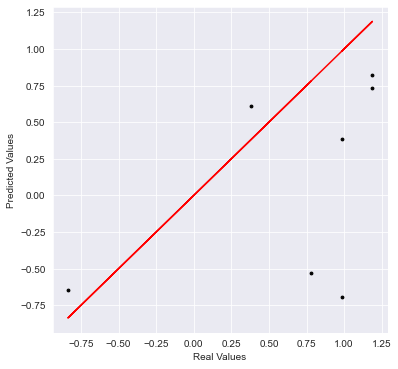

In [37]:
# Get the best estimator
gb_best_estimator = model_searcher.best_estimator_
y_test_pred = gb_best_estimator.predict(X_test_preprocessed)

evaluate_model("Gradient Boosting regressor (test data)", y_test_preprocessed, y_test_pred)

Non-linear models

# K-Nearest Neighbors Regression

In [38]:
from sklearn.neighbors import KNeighborsRegressor

estimator = KNeighborsRegressor()

# Parameter grid of regularization strengths
PARAM_GRID = {"n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}
# Search configuration
SCORING = ["r2","neg_mean_squared_error"]
SCORER = "neg_mean_squared_error"

SEARCH_CONFIGURATION = {
    "estimator": estimator,
    "param_grid": PARAM_GRID,
    "scoring": SCORING,
    "refit": SCORER,
    "n_jobs": 8
}

# GridSearchCV instantiation
model_searcher = GridSearchCV(**SEARCH_CONFIGURATION)

_ = model_searcher.fit(X_train_preprocessed, y_train_preprocessed)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [-10.41235039  -3.74367507  -1.23811526  -3.19411203  -2.98377422
  -6.42609259  -6.4935493   -7.1623614   -6.88655227          nan]
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [-1.90771029 -1.14575594 -1.08356961 -1.03720561 -1.02027193 -1.01526811
 -1.05621217 -0.99820849 -0.96372696         nan]
  warnings.warn(


K-Nearest Neighbors regressor (test data)- Mean Absolute Error: 0.8524726406418868
Mean Absolute Error (MAE): The average of the absolute differences between the predicted and actual values. It is expressed as: MAE = (1/n) * Σ|yi - ŷi|
K-Nearest Neighbors regressor (test data)- Mean Squared Error: 0.7908682510301378
Mean Squared Error (MSE): The average of the squared differences between the predicted and actual values. It is expressed as: MSE = (1/n) * Σ(yi - ŷi)^2
K-Nearest Neighbors regressor (test data)- R^2: -0.7833844747665981
R-squared (R2): The proportion of variance in the target variable that is explained by the model. It is expressed as: R2 = 1 - (Σ(yi - ŷi)^2 / Σ(yi - ȳ)^2)
K-Nearest Neighbors regressor (test data)- Mean Absolute Percentage Error: 93.47972245012326
Mean Absolute Percentage Error (MAPE): The average percentage difference between the predicted and actual values. It is expressed as: MAPE = (1/n) * Σ| (yi - ŷi) / yi |


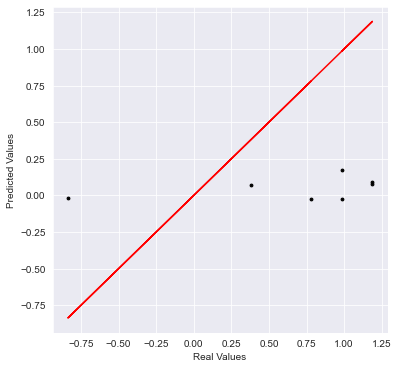

In [39]:
# Get the best estimator
knn_best_estimator = model_searcher.best_estimator_
y_test_pred = knn_best_estimator.predict(X_test_preprocessed)

evaluate_model("K-Nearest Neighbors regressor (test data)", y_test_preprocessed, y_test_pred)

In [40]:
the_best_model_ever = gb_best_estimator

# Feature importance

In [41]:
# Calculate the feature importances
importances = the_best_model_ever.feature_importances_

# Create a dataframe to store the feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
3,Blinks_Duration_Min,2.503990e-01
31,DVA_Sem_Fixations_Pre,2.372416e-01
8,Fixation_Mean_Pupil_StDev,1.004973e-01
7,Fixation_Mean_Pupil_Mean,6.658158e-02
28,DVA_Std_Fixations_Pre,4.751668e-02
30,DVA_Min_Fixations_Pre,4.294785e-02
25,DVA_Min_Gaze_Pre,3.557300e-02
22,DVA_Median_Gaze_Pre,3.439935e-02
6,Fixations_Duration_StDev,2.883964e-02
29,DVA_Max_Fixations_Pre,2.156230e-02
